### Comprehensive data exploration with Python
#### Purpose: understand our data
#### Author: Pedro Marcelino
##### Link: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# avoid warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [71]:
# load data
train = pd.read_csv('/Users/pliu/Downloads/all/train.csv')
test = pd.read_csv('/Users/pliu/Downloads/all/test.csv')
train.shape # (1460, 81)
test.shape # (1459, 80)

(1459, 80)

## Univariable Analysis

In [3]:
# univariable
# understand the target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

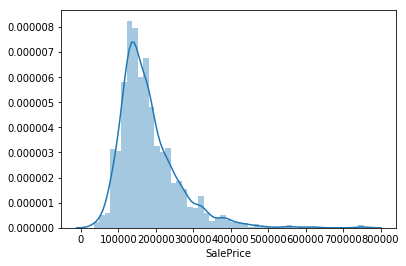

In [8]:
# check the distribution
sns.distplot(train.SalePrice) 
# findings: 
# deviation from normal distribution

# right skewed

In [11]:
# skewness and kurtosis
print('Skewness: %.2f' % train.SalePrice.skew())
print('kurtosis: %.2f ' % train.SalePrice.kurt())

Skewness: 1.88
kurtosis: 6.54 


## Multivariable Analysis 

### Relationship with numerical variables

In [86]:
# mutivariables - understand relationships
# concat vertically
def plot_scatter(x, y, df=train, y_lim=800000):
    data = pd.concat([df[x], df[y]], axis=1)
    data.plot.scatter(x=x, y=y, ylim=(0,y_lim))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


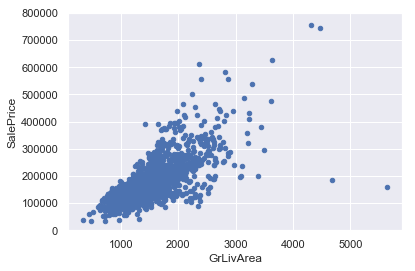

In [95]:
# check relationships btw 'GrLivArea' and 'SalePrice'
plot_scatter('GrLivArea','SalePrice')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


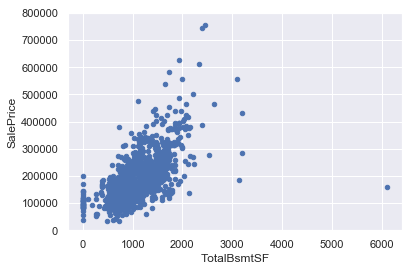

In [91]:
# check relationships btw 'TotalBsmtSF' and 'SalePrice'
plot_scatter('TotalBsmtSF','SalePrice')

In [21]:
# count of columns by data type
df_types = pd.DataFrame(train.dtypes)
df_types.columns = ['type']
df_types.type.value_counts()

object     43
int64      35
float64     3
Name: type, dtype: int64

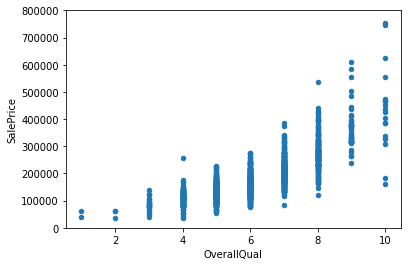

In [24]:
# check relationships btw 'OverallQual' and 'SalePrice'
plot_scatter('OverallQual','SalePrice') # OverallQual should be categorical var

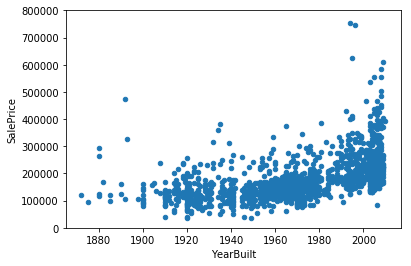

In [25]:
# check relationships btw 'YearBuilt' and 'SalePrice'
plot_scatter('YearBuilt','SalePrice') # YearBuilt should be categorical var

In [ ]:
# check relationships btw 'TotalBsmtSF' and 'SalePrice'
plot_scatter('TotalBsmtSF','SalePrice')

### Relationship with categorical variables

In [29]:
# use box plot
def plot_box(x, y, df=train, figsize=(8,6), y_lim=800000):
    data = pd.concat([df[x], df[y]], axis=1)
    f, ax = plt.subplots(figsize=figsize)
    fig = sns.boxplot(x=x, y=y, data=data)
    fig.axis(ymin=0, ymax=y_lim)

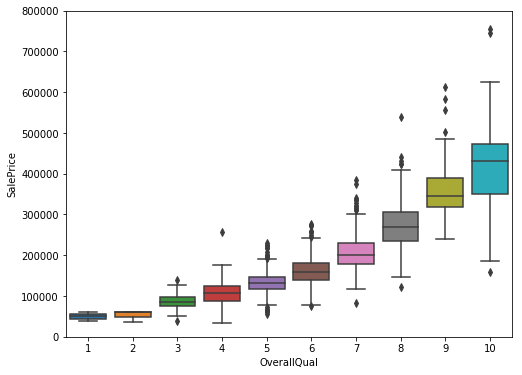

In [30]:
# check relationships btw 'OverallQual' and 'SalePrice'
plot_box('OverallQual', 'SalePrice')

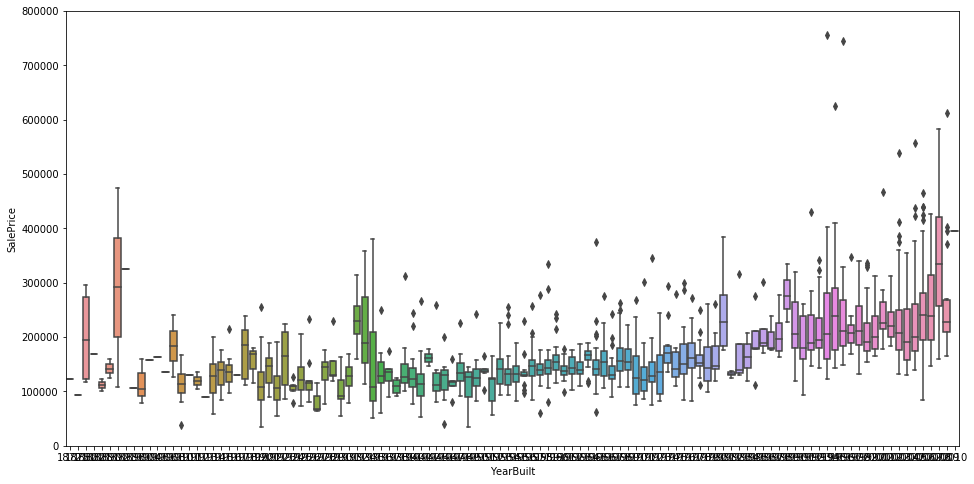

In [33]:
# check relationships btw 'YearBuilt' and 'SalePrice'
plot_box('YearBuilt', 'SalePrice',figsize=(16,8))

As shown above, there are several features that have strong simple relationships with target variable.
In this sense, the trick here for feature engineering is, more to choose appropriate features rather than defining the complex relationships between them.

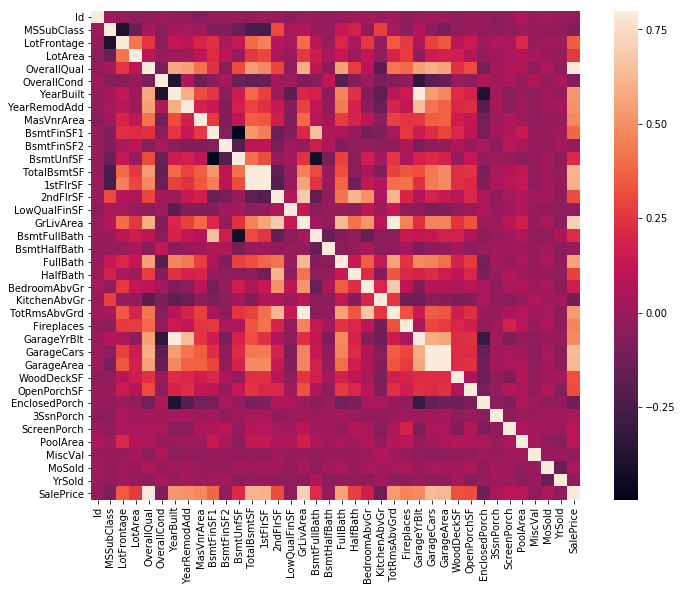

In [34]:
# correlation
corr = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

In [42]:
# what can be learnt from the heatmap?
# white square - multicollinearity, which is a condition that variables give alost same info
# e.g. garage size and cars fit in the garage
# b/c cars that fit into the garage is a consequence of the garage area

# take a closer look at the target variable
def plot_target_corr(y, df=train, n_largest=10):
    corr = df.corr()
    cols = corr.nlargest(n_largest, y)[y].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(9, 6))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                     fmt='.2f', annot_kws={'size':10}, 
                     yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

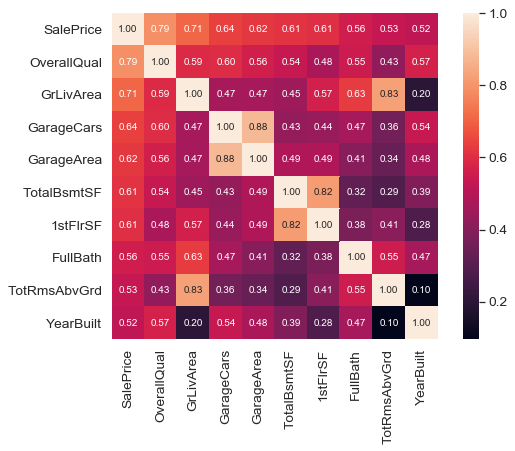

In [43]:
plot_target_corr('SalePrice')

In [47]:
def plot_scatter(cols, df=train):
    sns.set()
    sns.pairplot(df[cols], size = 3)
    plt.show()

/miniconda3/envs/ml36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


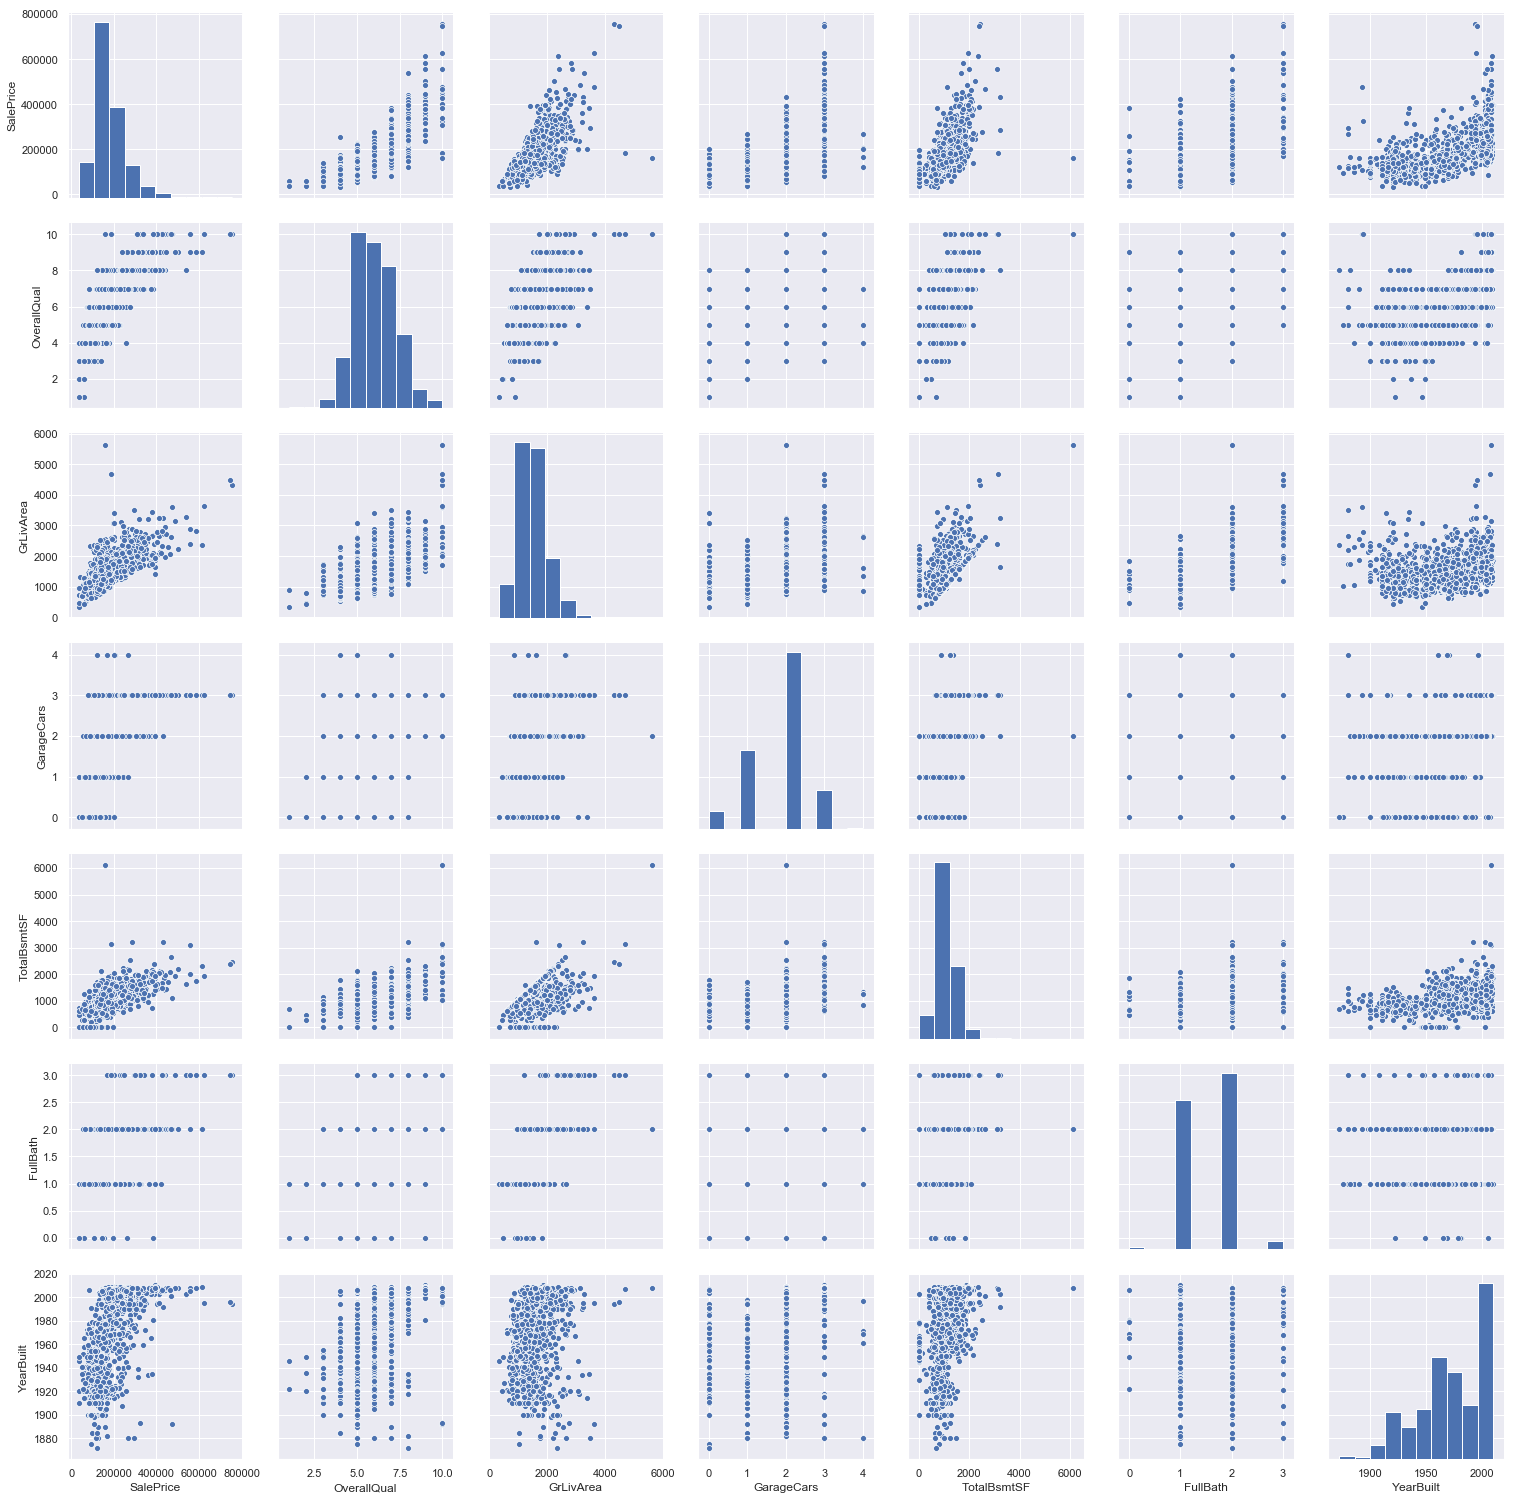

In [49]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
plot_scatter(cols)

In [57]:
def missing_data(df=train):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [63]:
missing_data = missing_data()
missing_data.head(20)
# PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage have more than 15% of data is missing
# None of these variables seem to be very important

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


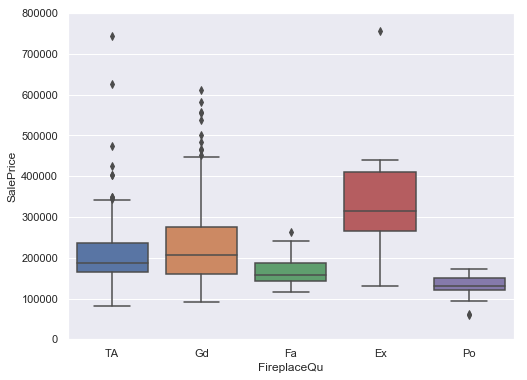

In [62]:
# check relationships btw 'PoolQC' and 'SalePrice'
plot_box('FireplaceQu', 'SalePrice')

In [73]:
# deal with missing values
# delete all cols with more than one missing value
train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1, inplace=True)

In [76]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [77]:
train.shape

(1459, 63)

## Outliers

### Univariate Analysis

In [79]:
from sklearn.preprocessing import StandardScaler
# establish a threshold 
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


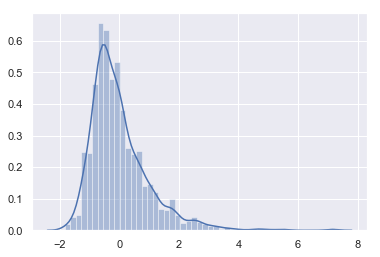

In [81]:
sns.distplot(saleprice_scaled)

In [82]:
print(low_range) # in range

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


In [83]:
print(high_range) # appreciable out of range

[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Bivariate Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


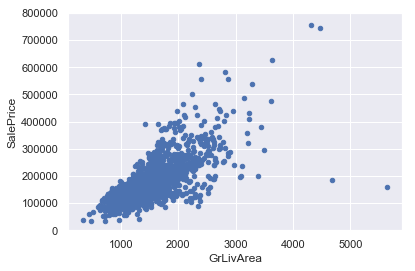

In [96]:
plot_scatter('GrLivArea','SalePrice')

In [97]:
# deleting points
train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index,inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


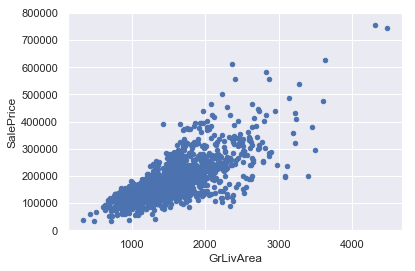

In [98]:
plot_scatter('GrLivArea','SalePrice')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


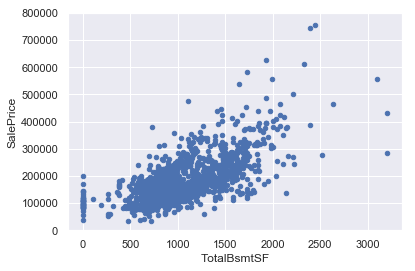

In [99]:
plot_scatter('TotalBsmtSF','SalePrice')

## Getting hardcore